# <center> R1.13 introduction à Python <br> TP4 - Nim, Grundy et IA </center>
<center> 2024/2025 - Thibault Godin </center>
<center> IUT de Vannes, BUT Informatique </center>

***

Dans ce TP, on va voir une méthode d'intelligence artificielle classique, **l'apprentissage par renforcement**


On va présenter cette notion à l'aide d'une activité proposée par des collègues de la [Maison des Mathématiques et de l'Informatique](https://mmi-lyon.fr/) (MMI) et du réseau Informatique Débranchée sur le jeu de _Nim_, puis on essaiera de l'appliquer au jeu de Grundy vu en JAVA en R1.01



- https://mmi-lyon.fr/?site_ressource_peda=jeu-de-nim-et-ia-avec-python
- https://mmi-lyon.fr/?site_ressource_peda=jeu-de-nim-et-ia
- video 

In [1]:
import random
import time

import numpy as np


import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 12)

from IPython.display import HTML

# Jeu de Nim


## Mise en place


Le jeu de Nim se joue à 2 joueurs selon les règles suivantes : 
- On commence la partie avec un tas de $n$ allumettes
- Les deux joueurs jouent alternativement
- Seulement 1, 2, ou 3 allumette(s) peuvent être retirée(s) par un joueur à chaque tour (par simplicité, on peut limiter ce choix à 1 ou 2)
- La personne qui tire la dernière alumettre a gagné (version normale, on peut aussi dire "la personne qui ne peut plus jouer a perdu")

>**_question 1_** <br>
jouer (en silence) une ou deux parties avec un voisin

>**_question 2_**<br> 
lire (en diagonale) à quoi ressemblent les (stratégies gagnantes)[https://interstices.info/jeux-de-nim/] de ce jeu 

>**_question 3_**<br> 
visualiser et comprendre l'apprentissage par renforcement proposé pour le jeu de Nim sur https://projet.liris.cnrs.fr/~mam/machine/




--------------------------



## Niammi : Nim Artificial Intelligence Maison des Mathématiques et de l'Informatique

Voici un programme Python (implémenté par Olivier Druet de la MMI) permettant de jouer au jeu de Nim contre un ordinateur _qui apprend au fur et à mieux jouer_. 

>**_question 4_**<br> 
lire et comprendre

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Fri Jan 21 10:32:50 2022

@author: druet
"""

import random
import time


################### le message de bienvenue et d'explication ##################

def welcome_message():
    print("""
----------------------------------------------------------------------------
                        Règles du jeu de Nim
----------------------------------------------------------------------------
Règles : 1 - L'utilisateur et l'ordinateur jouent à tour de rôle.
         2 - L'ordinateur commence.
         3 - Seulement 1 ou 2 bâtons peuvent être retirés à chaque coup.
         4 - Celui qui tire le dernier bâton a gagné.
         
----------------------------------------------------------------------------
                           Apprentissage
----------------------------------------------------------------------------                        
Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.
----------------------------------------------------------------------------
""")

#### Nous faisons commencer l'ordinateur parce que le premier joueur a une 
#### stratégie gagnante. Si le joueur commence et qu'il joue bien, la machine 
#### perdra quoiqu'elle fasse et n'apprendra rien. 

###############################################################################


################## définition et impression de la position de jeu #############

def printboard(n):
    board=[]
    for _ in range(n):
        board.append("/")
    print("\n----------------------------------------------------------------------------")
    print("      ",*board, sep="   ")
    print("----------------------------------------------------------------------------\n")
    print("Il reste " + str(n) + " allumettes.")
    
###############################################################################


################### initialisation de la machine ##############################

nombre_allumettes=8 ### vous pouvez changer le nombre d'allumettes de départ
board = [] ### le plateau de jeu
boulesjaunes = [] ### correspond au nombre de boules jaunes dans la case
boulesrouges = [] ### correspond au nombre de boules rouges dans la case
tirage = [] ### correspondra au tirage dans une partie
for _ in range(nombre_allumettes):
    boulesjaunes.append(2)
    boulesrouges.append(2)
    tirage.append(0)
#### Attention Python commence à 0 #####
boulesrouges[0]=0 #### il ne faut pas mettre de boules rouges dans la case 0, coup interdit


###############################################################################


#################### programme principal : jeu + renforcement #################
welcome_message()
uneautrepartie=True
compteur_partie=0
time.sleep(1)
print("La probabilité de gain de l'ordinateur à la première partie si le joueur joue optimalement est de 12,5 %")
time.sleep(1)
while uneautrepartie :
    player = "CMP"
    allumettes=nombre_allumettes
    tirage=[0,0,0,0,0,0,0,0]
    while allumettes>0:
        printboard(allumettes)  ### imprime la position de jeu
        time.sleep(1)
        if player=='CMP': ### c'est à l'ordinateur de jouer
            print("\nL'ordinateur choisit de retirer...")
            time.sleep(1)
            somme=boulesjaunes[allumettes-1]+boulesrouges[allumettes-1]
            boulehasard=random.randint(1,somme)##permet de tirer jaune ou rouge
            if boulehasard <= boulesjaunes[allumettes-1]: ##la machine a tiré jaune, i.e. elle enlève une allumette
                tirage[allumettes-1]=1
                allumettes=allumettes-1
                print("1 allumette.")
            else:
                tirage[allumettes-1]=2
                allumettes=allumettes-2
                print("2 allumettes.")
            if allumettes==0:
                winner='CMP'
            else:
                player='USER'  
        else: ### c'est au joueur de jouer
#### on demande au joueur ce qu'il souhaite jouer avec vérification que c'est un coup légal
            coup_joueur=0
            print("\n--À vous de jouer !--")
            while coup_joueur not in range(1, 3) or coup_joueur>allumettes:
                try:
                    coup_joueur = int(input("\nQuel est votre choix ?"))
                    if coup_joueur == 0:
                        print("\nVous devez enlever au moins une allumette !")
                    elif coup_joueur not in range(1, 3) or coup_joueur>allumettes:
                        print("\nVous ne pouvez pas enlever autant d'allumettes !")
                        coup_joueur = int(input("\nQuel est votre choix ?"))
                except Exception as e:
                    print("\nCela ne semble pas une réponse valide.\nError: " + str(e) + "\nRecommencez !")
##### fin du choix du joueur
            allumettes=allumettes-coup_joueur
            if allumettes==0:
                winner='USER'
            else:
                player='CMP' 
    compteur_partie+=1
##### fin de la partie ######
##### annonce des résultats #####
    if winner=='CMP':
        print("\n----------------------------------------------------------------------------")
        print("L'ordinateur a gagné, nous allons le récompenser.")
        print("----------------------------------------------------------------------------\n")
    else:
        print("\n----------------------------------------------------------------------------")
        print("Bravo ! Vous avez gagné ! Nous allons punir l'ordinateur.")
        print("----------------------------------------------------------------------------\n")
##### Apprentissage : récompense ou punition de l'ordinateur#####        
    if winner=='CMP': ###récompense
        for i in range(nombre_allumettes):
            if tirage[i]==1:
                boulesjaunes[i]=boulesjaunes[i]+1
            if tirage[i]==2:
                boulesrouges[i]=boulesrouges[i]+1
    else: ###punition
        for i in range(nombre_allumettes):
            if tirage[i]==1:
                boulesjaunes[i]=boulesjaunes[i]-1
            if tirage[i]==2:
                boulesrouges[i]=boulesrouges[i]-1
####### fin de la récompense ou de la punition #################
####### réinitialisation des verres vides ######################
    for i in range(nombre_allumettes):
        if (boulesjaunes[i]==0) and (boulesrouges[i]==0):
            boulesjaunes[i]=2
            boulesrouges[i]=2
######## impression de l'état des verres #######################
    time.sleep(1)
    for i in range(nombre_allumettes):
        print("Dans le verre " + str(i+1) +", il y a " + str(boulesjaunes[i]) + " boules jaunes et " + str(boulesrouges[i]) + " boules rouges.")
################################################################
############ calcul de la probabilité de gagner ################
    time.sleep(1)
    if (boulesjaunes[3]/(boulesjaunes[3]+boulesrouges[3]))>(boulesrouges[4]/(boulesjaunes[4]+boulesrouges[4])):
        proba=(boulesrouges[7]/(boulesjaunes[7]+boulesrouges[7]))*(boulesrouges[4]/(boulesjaunes[4]+boulesrouges[4]))*(boulesrouges[1]/(boulesjaunes[1]+boulesrouges[1]))
    else:
        proba=(boulesrouges[7]/(boulesjaunes[7]+boulesrouges[7]))*(boulesjaunes[3]/(boulesjaunes[3]+boulesrouges[3]))*(boulesrouges[1]/(boulesjaunes[1]+boulesrouges[1]))
    print("\n----------------------------------------------------------------------------")
    print("Vous avez joué "+ str(compteur_partie) +" parties.")
    print("----------------------------------------------------------------------------\n")
    print("\n----------------------------------------------------------------------------")
    print("La probabilité de gain de l'ordinateur à la prochaine partie si le joueur joue optimalement (en connaissant l'état des verres :-)) est de " + str(round(proba*100,2)) + "%")
    print("----------------------------------------------------------------------------\n")
################################################################
############ On continue ? ################    
    test=True
    while test:
        another_go = input("\nVoulez-vous rejouer ?[O/N]: ")
        if another_go in ("o","O"):
            uneautrepartie=True
            test=False
        elif another_go in ("n","N"):
            uneautrepartie=False
            test=False
        else:
            print("\nChoix invalide. Recommencez !")    
############################################            
            




 



----------------------------------------------------------------------------
                        Règles du jeu de Nim
----------------------------------------------------------------------------
Règles : 1 - L'utilisateur et l'ordinateur jouent à tour de rôle.
         2 - L'ordinateur commence.
         3 - Seulement 1 ou 2 bâtons peuvent être retirés à chaque coup.
         4 - Celui qui tire le dernier bâton a gagné.
         
----------------------------------------------------------------------------
                           Apprentissage
----------------------------------------------------------------------------                        
Suivant qu'il gagne ou perd, l'ordinateur reçoit une récompense ou une punition.
----------------------------------------------------------------------------

La probabilité de gain de l'ordinateur à la première partie si le joueur joue optimalement est de 12,5 %

----------------------------------------------------------------------------


# Grundy


plan conseillé : 

1. affichage du plateau
2. alternance des joueurs et propositions des coups admissibles
3. condition de victoire
4. stockage de stratégie
5. jeu humain v. humain
6. jeu humain v. ordinateur
8. règle de l'apprentissage de l'ordinateur (en cas de victoire ou de défaite)
9. entrainement de l'ordinateur contre l'humain
10. entrainement de l'ordinateur contre le hasard
11. entrainement de l'ordinateur contre l'ordinateur


Vous pouvez bien sûr recycler du code Java de R1.01, ainsi que le code de Nim proposé plus haut (essayez d'être aussi clair dans votre code).

Le jeu de Grundy étant plus complexe que celui de Nim, on fera des fonctions !

**bonus** Une fois la machine entrainée, retrouver les positions gagnante à l'aide de la stratégie obtenue

In [3]:
def display_board_with_x(l):

    print()

# Example usage:
l=[2,3,1,1]
display_board_with_x(l)


In [4]:
# def coupJoueur(l):



In [5]:
def PartieJvJ():
   
    print("\nChoix invalide. Recommencez !")    
    ############################################            
            
PartieJvJ()


Choix invalide. Recommencez !


### Quelques fonctions pouvant être utiles

In [6]:
np.random.rand()< .5

True

In [7]:
#random values with dictionaries


from collections import Counter


d = {
 'a': [1, 3, 2],
 'b': [6],
 'c': [0, 0]
}



n = 100000
l = [random.choice([key for key, values in d.items() for x in values]) for i in range(n)]

cnt = Counter(l)
frq = {k: v / n for k, v in cnt.items()}
frq

{'c': 0.33361, 'a': 0.50147, 'b': 0.16492}

In [8]:
#random values 

from collections import Counter


d = {
 'a': 4,
 'b': 1,
 'c': 2
}



n = 100000
l = [random.choice([key for key, value in d.items() for x in range(value)]) for i in range(n)]

cnt = Counter(l)
frq = {k: v / n for k, v in cnt.items()}
frq

{'a': 0.57071, 'c': 0.28782, 'b': 0.14147}

In [9]:
sorted(d, key=d.get)[-2] 
sum(d.values())

7

In [10]:
l = [1, 2, 3, 4, 5, 6]
def intlist2str(l):
    return("".join(str(i) for i in l))
intlist2str(new)

def str2intlist(s):
    l=[]
    for c in s:
        l.append(int(c))
    return l
str2intlist('1234')

NameError: name 'new' is not defined

### Un exemple de résultat attendu

Après entrainement contre un environement jouant aléatoirement, l'ordinateur gagne 
 -------------- 0.8807 % du temps


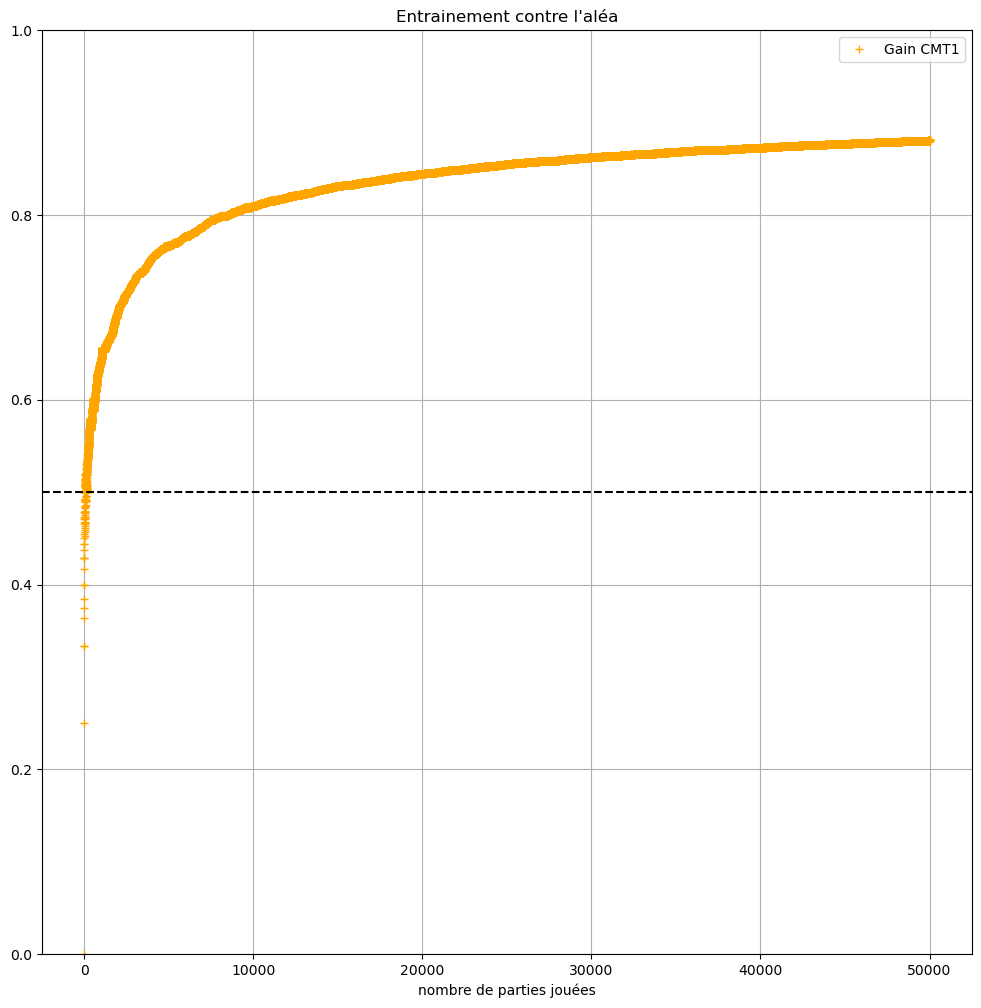